In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
#data structure
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()
#object는 데이터를 csv 파일에서 읽어 들였기 때문에 텍스트 특성일 것. categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#see categorical variable. categorical가 어떤 내용들이 있는지 확인
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
#see summary of integer variables
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


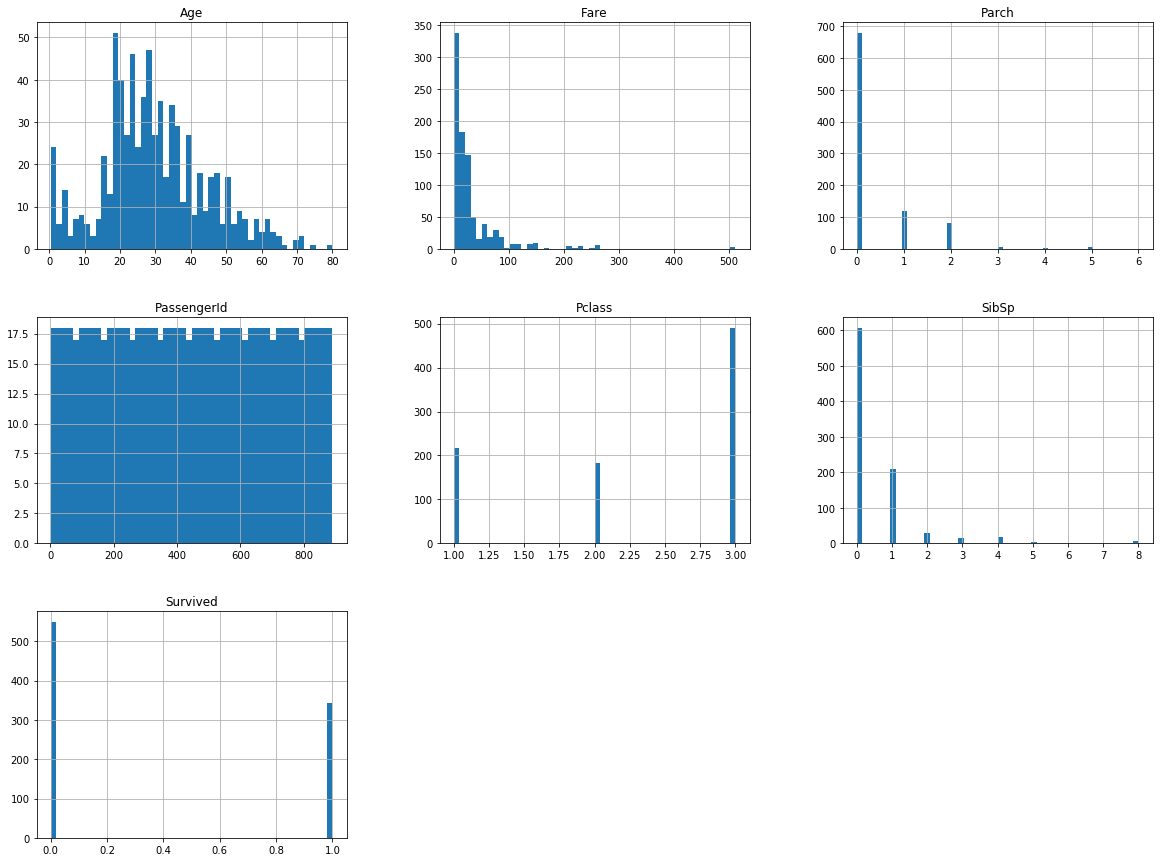

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20, 15))
plt.show()
#plotting histograms of continuous variables

In [9]:
# number of null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
def bar_chart(var):
    dead = data[data['Survived'] == 0][var].value_counts()
    survived = data[data['Survived'] == 1][var].value_counts()
    df = pd.DataFrame([dead, survived])
    df.index = ['Dead', 'Survived']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

In [11]:
def bar_plot(set, var):
    dead = set[set['Survived'] == 0][var].value_counts()
    survived = set[set['Survived'] == 1][var].value_counts()
    df = pd.DataFrame([dead, survived])
    df.index = ['Dead', 'Survived']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

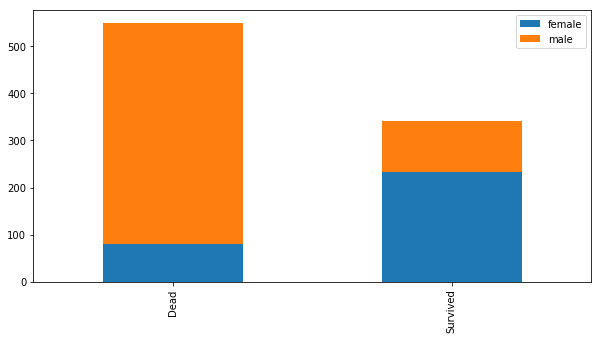

In [12]:
bar_chart('Sex')

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

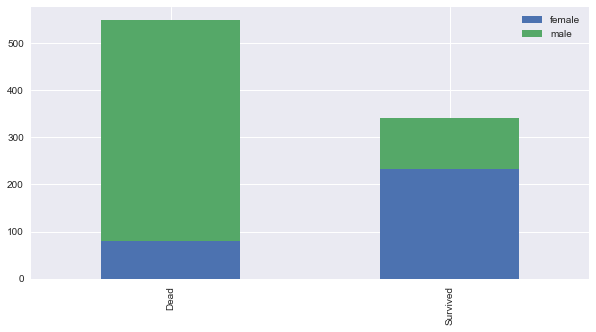

In [14]:
bar_chart('Sex')

'Sex' is a valid variable. It tends to be seen that **Men** are more likely dead than Women.

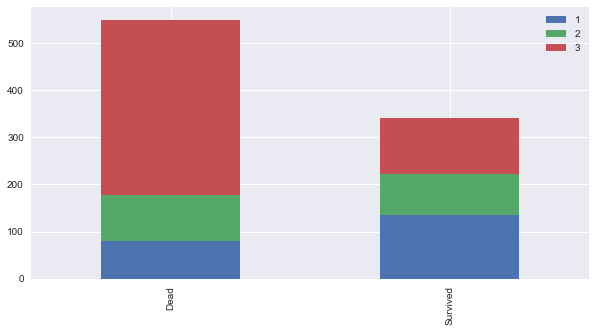

In [15]:
bar_chart('Pclass')

Passengers **in the higher class** tends to have survived more.

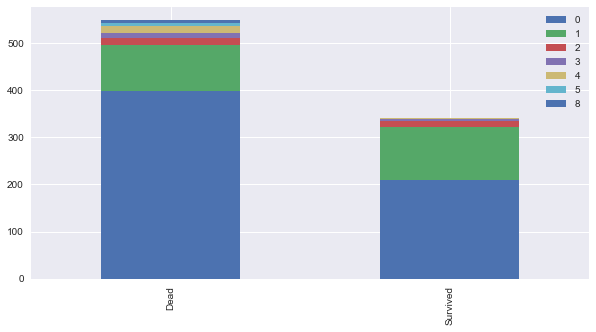

In [16]:
bar_chart('SibSp')

It seems that people who have more slblings or spouses more likely dead.

--------------

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
test = pd.read_csv('data/test.csv')

In [19]:
full_data = [data, test]

for d in full_data:
    d['Title'] = d['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

To make the derived variable from the Name, 'Title', used regexp. Also, the test set got engineered same as the train set(data) to make prediction more accurate using the derived variable. 

In [20]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Mme           1
Capt          1
Sir           1
Jonkheer      1
Ms            1
Don           1
Countess      1
Name: Title, dtype: int64

In [21]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

#### Title mapping
mr: 0 <br/>
miss: 1 <br/>
mrs: 2 <br/>
others: 3 <br/>

In [22]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for d in full_data:
    d['Title'] = d['Title'].map(title_mapping)

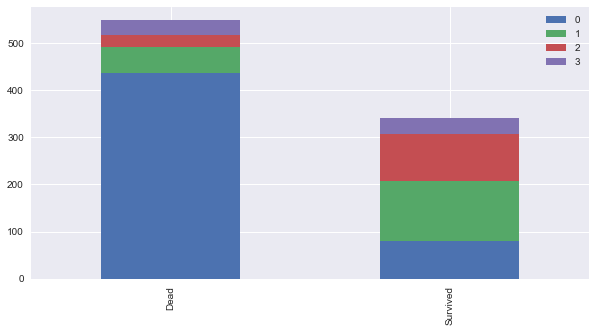

In [23]:
bar_chart('Title')

In [24]:
test['Title'].value_counts()

0    240
1     78
2     72
3     28
Name: Title, dtype: int64

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


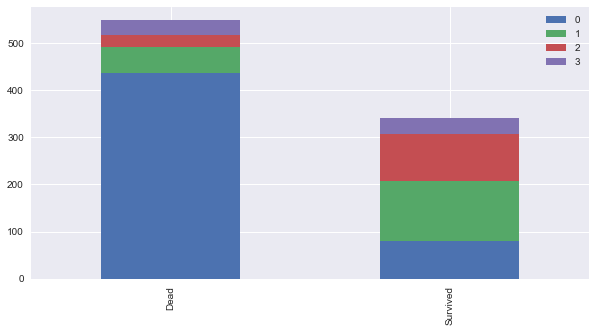

In [26]:
bar_chart('Title')

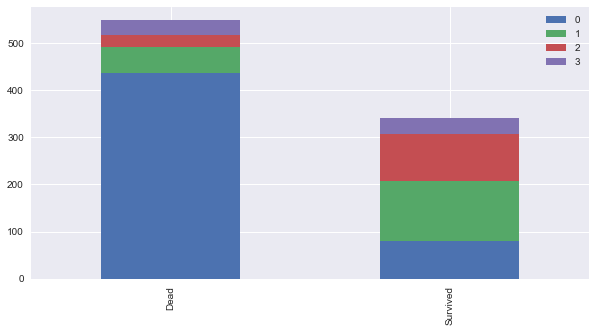

In [27]:
bar_plot(data, 'Title')

In [28]:
# delete unnecessary feature from the training and test set.
data.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [29]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


--------

In [30]:
gender_mapping = {'male': 0, 'female': 1}
for d in full_data:
    d['Sex'] = d['Sex'].map(gender_mapping)

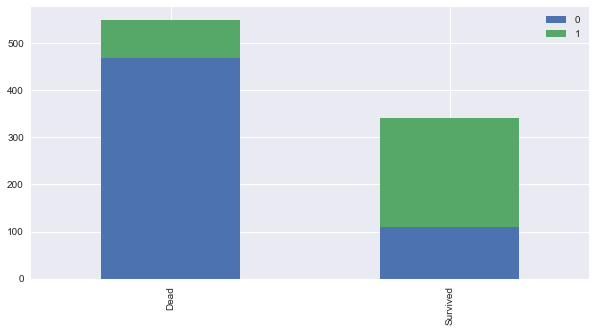

In [31]:
bar_chart('Sex')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [33]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


-----------------------

We are manipulating null values in the 'Age' column.

In [34]:
data['Age'].isnull().sum()

177

In [35]:
data[data['Age'].isnull() == True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,0,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,1,NaN,0,0,2649,7.2250,NaN,C,2
26,27,0,3,0,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,1,NaN,0,0,330959,7.8792,NaN,Q,1
29,30,0,3,0,NaN,0,0,349216,7.8958,NaN,S,0
31,32,1,1,1,NaN,1,0,PC 17569,146.5208,B78,C,2
32,33,1,3,1,NaN,0,0,335677,7.7500,NaN,Q,1
36,37,1,3,0,NaN,0,0,2677,7.2292,NaN,C,0
42,43,0,3,0,NaN,0,0,349253,7.8958,NaN,C,0


It seems that **putting a median value** for null values in the Age column grouping **'Title'** or **'Pclass'** is doable.

In [36]:
data.groupby('Title')['Age'].mean()
#Mr/Miss/Mrs/Others

Title
0    32.368090
1    21.773973
2    35.898148
3    20.430161
Name: Age, dtype: float64

In [37]:
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

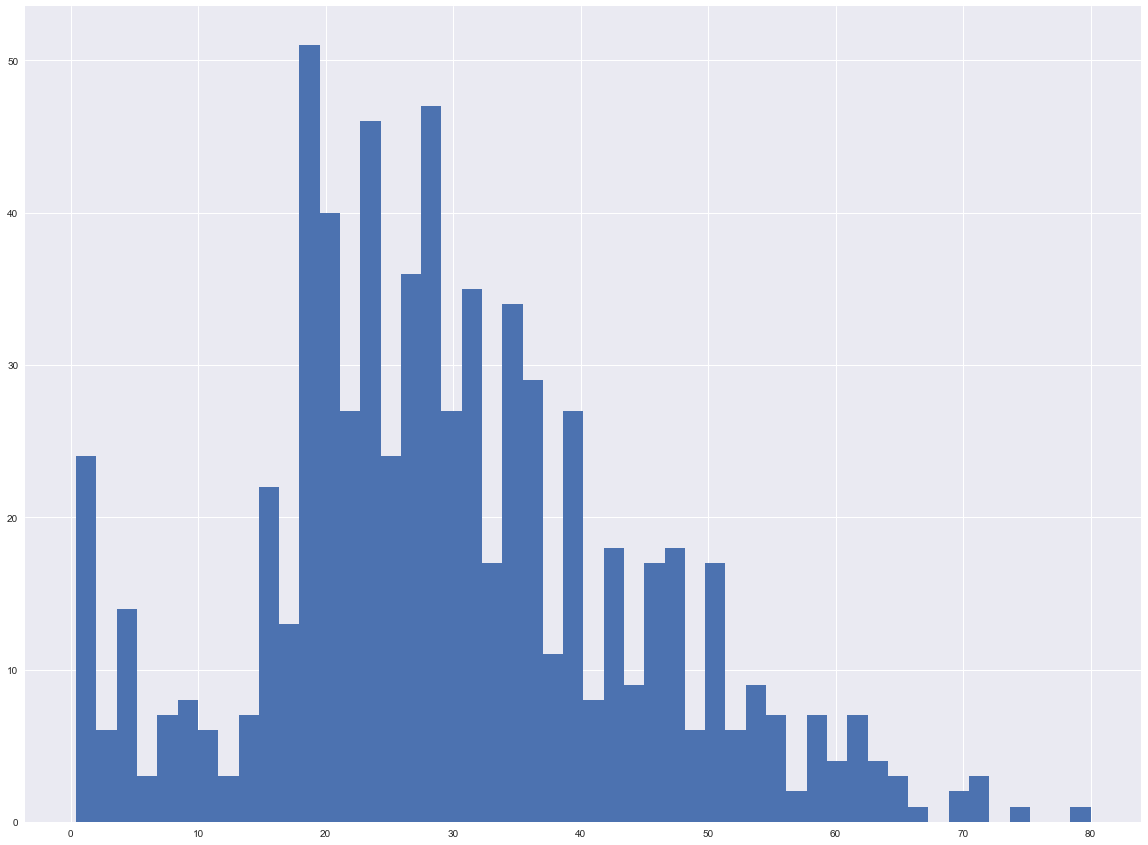

In [38]:
data['Age'].hist(bins = 50, figsize = (20, 15))
plt.show()

In [39]:
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

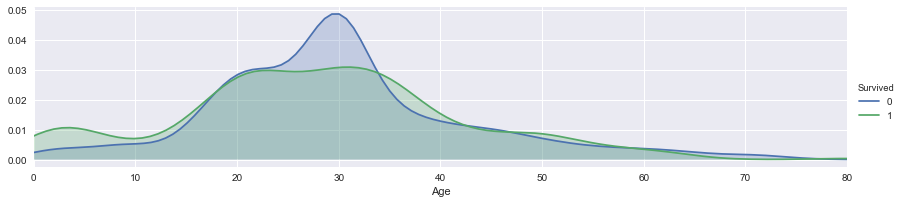

In [40]:
#To see 'Age' distribution
facet = sns.FacetGrid(data, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, data['Age'].max()))
facet.add_legend()

plt.show()

(10, 20)

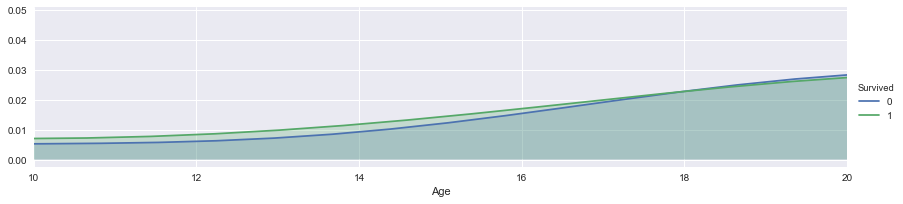

In [41]:
facet = sns.FacetGrid(data, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, data['Age'].max()))
facet.add_legend()
plt.xlim(10, 20)

(20, 30)

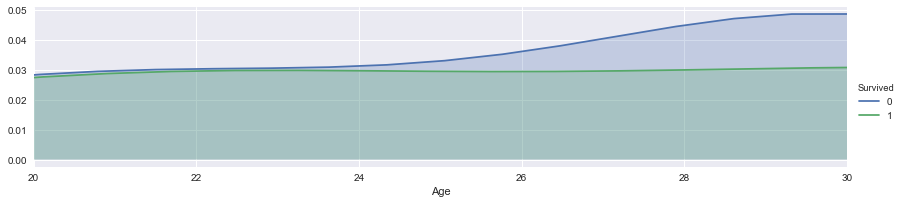

In [42]:
facet = sns.FacetGrid(data, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, data['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30, 40)

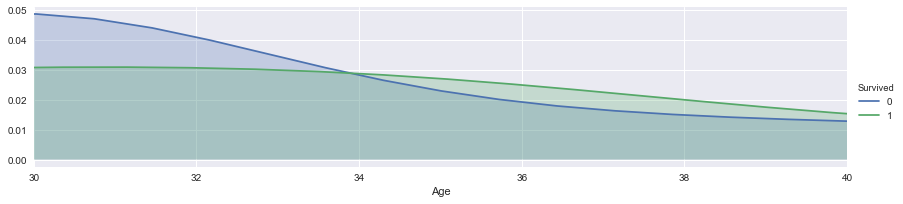

In [43]:
facet = sns.FacetGrid(data, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, data['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

In [44]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


(891, 12)

In [45]:
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


(418, 11)

------

Needs binning(bucketing) numrical **Age** to cagorical(interval) variable. Because this continuous variable has too much meaningless infromation.

mapping sheet: <br/>
child: 0 (0~15) <br/>
teen & early 20's: 1 (15~25) <br/>
2030's: 2 (25~35) <br/>
mid-age: 3 (35~55) <br/>
senior: 4 (55~.) <br/>

In [46]:
for d in full_data:
    d.loc[d['Age'] <= 15, 'Age'] = 0,
    d.loc[(d['Age'] > 15) & (d['Age'] <= 25), 'Age'] = 1,
    d.loc[(d['Age'] > 25) & (d['Age'] <= 35), 'Age'] = 2,
    d.loc[(d['Age'] > 35) & (d['Age'] <= 55), 'Age'] = 3,
    d.loc[d['Age'] > 55, 'Age'] = 4

In [47]:
data['Age'].sum()

1609.0

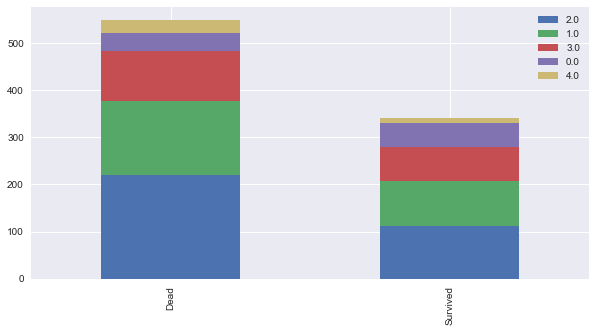

In [48]:
bar_chart('Age')

It seems that people who were in between 0 and 15 years old more likely survived.

----

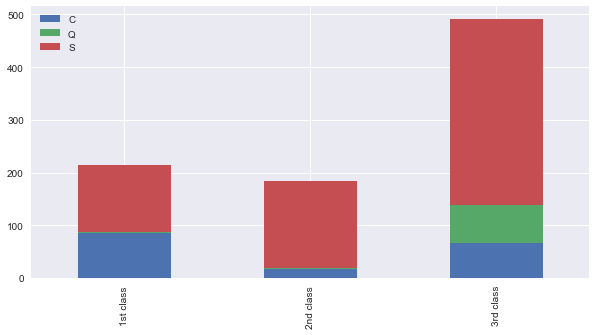

In [49]:
#the harbor where each passenger took the ship

Pclass1 = data[data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = data[data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = data[data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

It seems that most of passengers are from S(Southampton).

In [50]:
for d in full_data:
    d['Embarked'] = d['Embarked'].fillna('S')

In [51]:
d['Embarked'].isnull().sum()

0

mapping for **Embarked**<br/>
S:0 <br/> C:1 <br/> Q:2

In [52]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for d in full_data:
    d['Embarked'] = d['Embarked'].map(embarked_mapping)

In [53]:
# fill missing Fare with median fare for each class
data["Fare"].fillna(data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

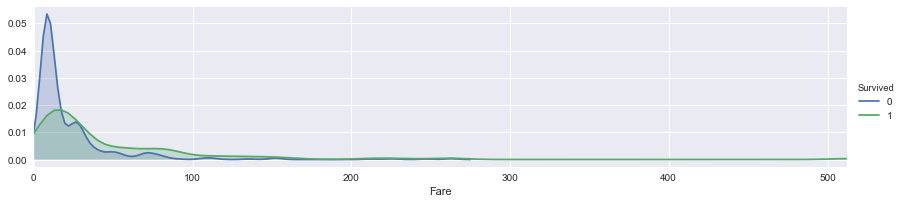

In [54]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, data['Fare'].max()))
facet.add_legend()
 
plt.show()  

(0, 50)

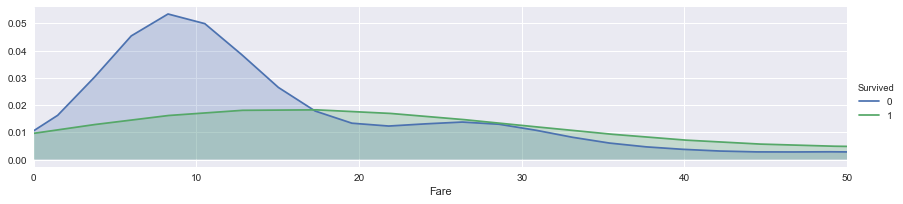

In [55]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 50)

In [56]:
for d in full_data:
    d.loc[d['Fare'] <= 17, 'Fare'] = 0,
    d.loc[(d['Fare'] > 17) & (d['Fare'] <= 30), 'Fare'] = 1,
    d.loc[(d['Fare'] > 30) & (d['Fare'] <= 100), 'Fare'] = 2,
    d.loc[d['Fare'] > 100, 'Fare'] = 3

In [57]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


--------

In [58]:
data['Cabin'].value_counts().head()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
E101           3
Name: Cabin, dtype: int64

**Cabin grade extraction.**<br/>
The location of cabins based on grades is related with survival ratio because of kneeling over of Titanic.

In [59]:
for d in full_data:
    d['Cabin'] = d['Cabin'].str[:1]

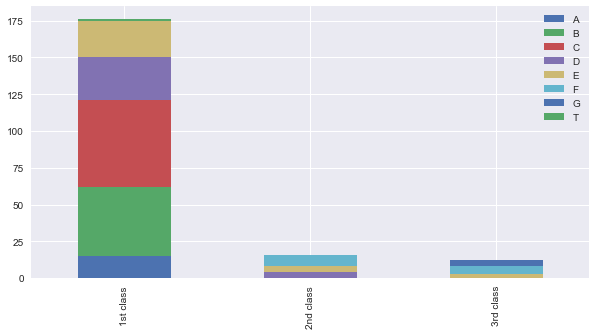

In [60]:
Pclass1 = data[data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = data[data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = data[data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Only 1st class has a code 'A', 'B' and 'C'.

In [61]:
#feature scaling
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for d in full_data:
    d['Cabin'] = d['Cabin'].map(cabin_mapping)

In [62]:
# fill missing Cabin value with median for each Pclass
data["Cabin"].fillna(data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

-----

In [63]:
#derived variable 'family size'

data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

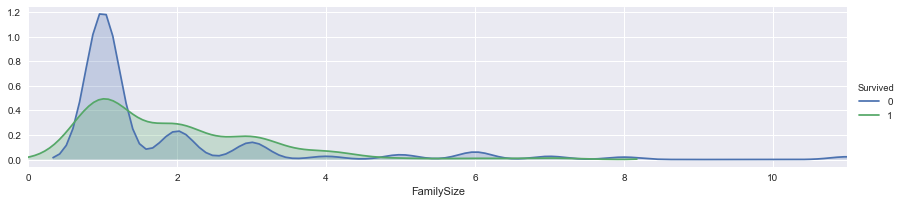

In [64]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [65]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for d in full_data:
    d['FamilySize'] = d['FamilySize'].map(family_mapping)

In [66]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [67]:
features_drop = ['Ticket', 'SibSp', 'Parch']
data = data.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [68]:
data = data.drop(['PassengerId'], axis = 1)
training_set = data.drop('Survived', axis = 1)
answer = data['Survived']

In [69]:
training_set.shape, answer.shape

((891, 8), (891,))

In [70]:
training_set.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,2.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [71]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,4.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8


-----

## MODELING

First trial: Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [78]:
rf = RandomForestClassifier(n_estimators=15)
scoring = 'accuracy'
score = cross_val_score(rf, training_set, answer, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[ 0.77777778  0.85393258  0.78651685  0.78651685  0.87640449  0.83146067
  0.79775281  0.80898876  0.78651685  0.80898876]


In [79]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.150000000000006

## TESTING

In [82]:
#061518
clf = RandomForestClassifier(n_estimators=15)
clf.fit(training_set, answer)

test_set = test.drop('PassengerId', axis = 1).copy()
prediction = clf.predict(test_set)

In [85]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [86]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Recorded #7022 scoring 0.77033